In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 県別累積患者数

In [2]:
df = pd.read_csv('data/covid19_pref_accum_20200501.csv')

df.head()

,Unnamed: 0,date,神奈川県,東京都,愛知県,奈良県,北海道,大阪府,不明,千葉県,...,関西国際空港,岡山県,青森県,鹿児島県,富山県,山形県,島根県,鳥取県,Unnamed: 53,岩手県
0,0,01/15/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,01/16/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,01/17/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,01/18/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,01/19/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


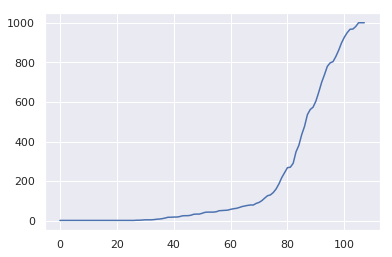

In [3]:
plt.Figure()
df["神奈川県"].plot()

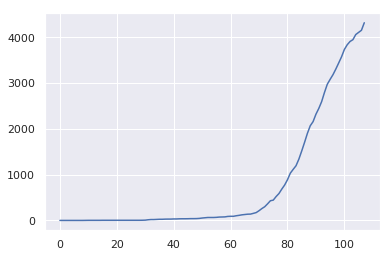

In [4]:
plt.Figure()
df["東京都"].plot()

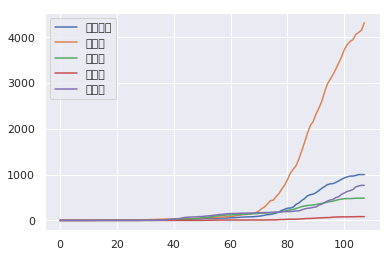

In [5]:
top5 = df.iloc[:, 2:7]
plt.Figure()
top5.plot()

## 地方別累積患者数

In [7]:
df2 = pd.read_csv('data/covid19_region_accum_20200501.csv')

df2.tail()

,date,Hokkaido,Tohoku,Kanto,Chubu,Kinki,Chugoku,Shikoku,Kyusyu
103,04/27/2020,675.0,260.0,6935.0,1428.0,2745.0,233.0,152.0,1094.0
104,04/28/2020,731.0,267.0,7068.0,1448.0,2792.0,235.0,153.0,1104.0
105,04/29/2020,753.0,270.0,7151.0,1465.0,2845.0,236.0,154.0,1121.0
106,04/30/2020,766.0,270.0,7204.0,1465.0,2873.0,236.0,154.0,1121.0
107,05/01/2020,766.0,270.0,7369.0,1465.0,2873.0,236.0,154.0,1121.0


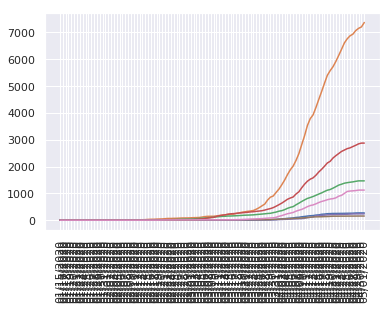

In [8]:
plt.Figure()
plt.xticks(rotation=90)
plt.plot(df2["date"], df2.iloc[:,2:])

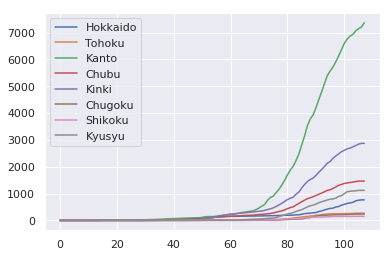

In [9]:
plt.Figure()
df2.plot()

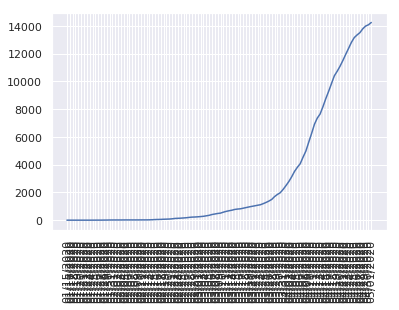

In [10]:
all_data = pd.DataFrame()
#all_data = df2
all_data = df2.drop(columns=["Hokkaido", "Tohoku", "Kanto", "Chubu", "Kinki", "Chugoku", "Shikoku", "Kyusyu"])
all_data["total"] = (df2.sum(axis=1))

plt.Figure()
plt.xticks(rotation=90)
plt.plot(all_data["date"], all_data["total"])

## 地方別患者数

In [11]:
df3 = pd.read_csv('data/covid19_region_20200501.csv')

df3.tail()

,date,Hokkaido,Tohoku,Kanto,Chubu,Kinki,Chugoku,Shikoku,Kyusyu
103,04/27/2020,25.0,2.0,62.0,14.0,49.0,6.0,0.0,8.0
104,04/28/2020,56.0,7.0,133.0,20.0,47.0,2.0,1.0,10.0
105,04/29/2020,22.0,3.0,83.0,17.0,53.0,1.0,1.0,17.0
106,04/30/2020,13.0,0.0,53.0,0.0,28.0,0.0,0.0,0.0
107,05/01/2020,0.0,0.0,165.0,0.0,0.0,0.0,0.0,0.0


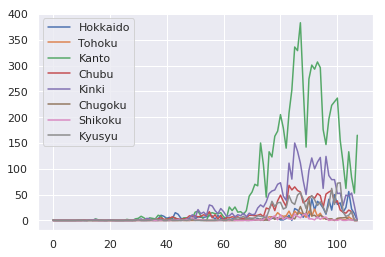

In [12]:
plt.Figure()
df3.plot()

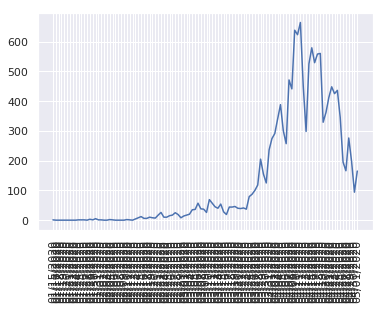

In [13]:
all_data2 = pd.DataFrame()
all_data2 = df3.drop(columns=["Hokkaido", "Tohoku", "Kanto", "Chubu", "Kinki", "Chugoku", "Shikoku", "Kyusyu"])
all_data2["total"] = (df3.sum(axis=1))

plt.Figure()
plt.xticks(rotation=90)
plt.plot(all_data2["date"], all_data2["total"])

In [14]:
all_data2.to_csv('data/all_data_20200501.csv')

## Data analysis

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


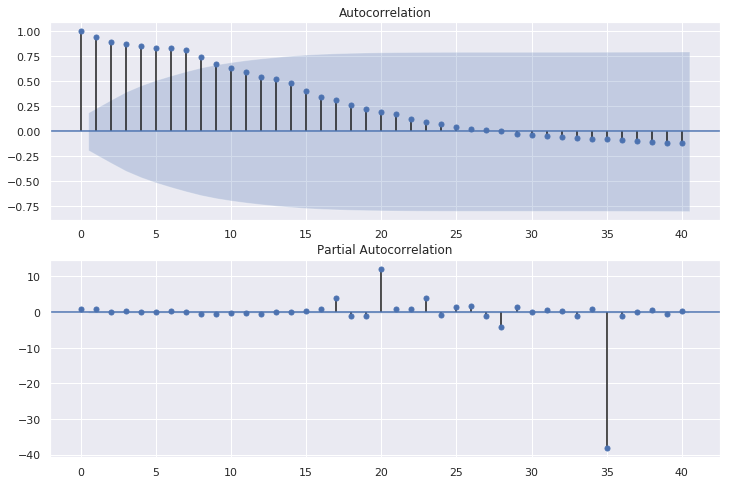

In [15]:
# コレログラム
# 後半になるにつれ相関係数が小さくなっていっている
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(all_data2.total, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(all_data2.total, lags=40, ax=ax2)

/home/tatsuki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


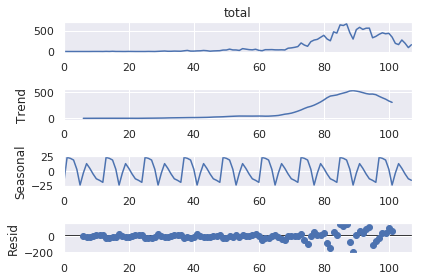

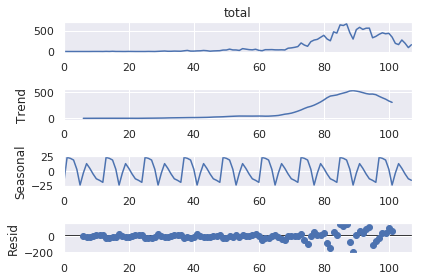

In [16]:
# データをトレンドと季節成分に分解
seasonal_decompose_res = sm.tsa.seasonal_decompose(all_data2.total, freq=12)
seasonal_decompose_res.plot()

データが定常かどうかを調べるため，単位根検定を行う

In [17]:
# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(all_data2.total, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(all_data2.total, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(all_data2.total, regression="nc")

print("ct:", end="")
print(ct[1])
print("c:", end="")
print(c[1])
print("nc:", end="")
print(nc[1])

ct:0.04242348014694679
c:0.017100827831026667
nc:0.0023015393372585566


In [18]:
diff = all_data.total.diff()
diff = diff.dropna()

# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(diff, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(diff, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(diff, regression="nc")

print("ct:", end="")
print(ct[1])
print("c:", end="")
print(c[1])
print("nc:", end="")
print(nc[1])

ct:0.0448832897379266
c:0.017832757034357785
nc:0.0024416384472951036


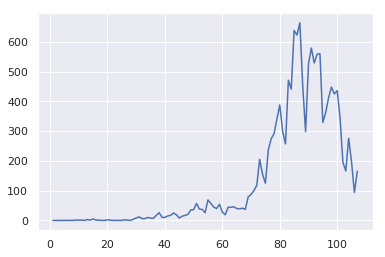

In [19]:
plt.plot(diff)

In [20]:
diff = diff.diff()
diff = diff.dropna()

# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(diff, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(diff, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(diff, regression="nc")

print("ct:", end="")
print(ct[1])
print("c:", end="")
print(c[1])
print("nc:", end="")
print(nc[1])

ct:0.98147329953611
c:0.8758154528556015
nc:0.40303062784481897


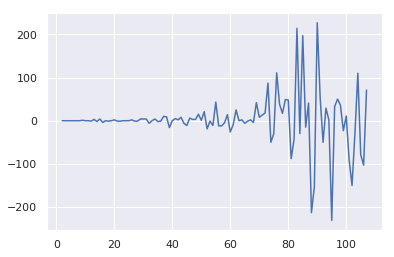

In [21]:
plt.plot(diff)

In [22]:
diff = diff.diff()
diff = diff.dropna()

# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(diff, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(diff, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(diff, regression="nc")

print("ct:", end="")
print(ct[1])
print("c:", end="")
print(c[1])
print("nc:", end="")
print(nc[1])

ct:1.6310751812723003e-17
c:1.1183831954081342e-19
nc:1.107440808784852e-19


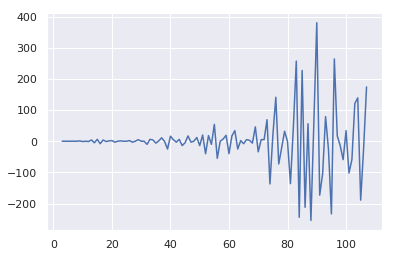

In [23]:
plt.plot(diff)

In [24]:
# たぶん和分過程なので、差分をとる
diff = all_data2.total - all_data2.total.shift()
diff = diff.dropna()

# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
resDiff

/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

{'aic':              0            1            2
 0          NaN  1183.121455  1178.237295
 1  1183.584312  1181.921337  1180.235276
 2  1178.744040  1180.059568  1181.889609
 3  1180.565647  1181.978915  1183.889606
 4  1182.056430  1183.053392  1157.373946, 'aic_min_order': (4, 2)}

In [25]:
# P-4, q=2 が最善となったので、それをモデル化
from statsmodels.tsa.arima_model import ARIMA
ARIMA_4_1_2 = ARIMA(all_data2.total, order=(4, 1, 2)).fit(dist=False)
ARIMA_4_1_2.params

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:714: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:716: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.p

const            2.223913
ar.L1.D.total    0.542938
ar.L2.D.total   -0.986088
ar.L3.D.total    0.159509
ar.L4.D.total   -0.477721
ma.L1.D.total         NaN
ma.L2.D.total    1.000000
dtype: float64

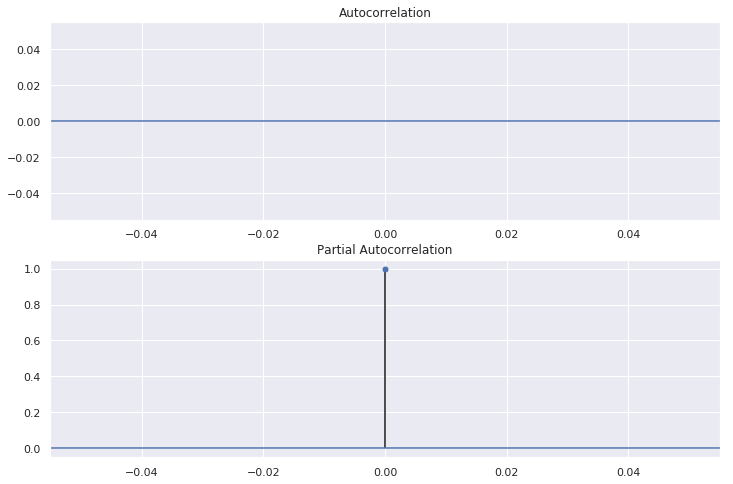

In [26]:
# 残差のチェック
resid = ARIMA_4_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [27]:
# 予測
pred = ARIMA_4_1_2.predict(all_data.index)

# 実データと予測結果の図示
plt.plot(all_data2.total)
plt.plot(pred, "r")


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'